# Лабораторная работа №5
## Логические методы классификации
## Вариант №13

### Цель работы

изучение принципов построения информационных систем с использованием логических методов классификации.

### Задачи 

 - освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
 - освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
 - изучение параметров логической классификации;
 - освоение модификаций логических методов классификации.

### Индивидуальное задание

1. Подберите набор данных на ресурсах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима.

https://www.kaggle.com/datasets/nikhil25803/github-dataset/data

2. Выполните построение модели классификации на основе дерева классификации. В ходе решения задачи необходимо решить следующие подзадачи:
 
 - Построение логического классификатора с заданием max_depth (максимальной глубины) и max_features (максимального количества признаков) пользователем (установить любые); визуализация дерева решений для выбранных исследователем параметров; 
 - Вычисление оценки cross validation (MSE) для различнх значений max_depth (построить график зависимости);
 - Вычисление оценки cross validation (MSE) для различнх значений max_features (построить график зависимости);
 - Вычислите оптимальные значения max_depth и max_features. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_source = "github.csv"
data = pd.read_csv(data_source)
data.sample(10)

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
749,douglascrockford/fash,29,6,1,0,0,Assembly
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript
114,WhiteHouse/fortyfour,339,58,15,6,5,CSS
28,adrianhajdin/project_cryptoverse,0,298,49,16,2,JavaScript
753,jhonsnow456/Tkinter-Collections,0,0,1,0,0,Python
451,vicky002/1000_Projects,0,298,3,1,4,NaN
920,lucianmarin/wp-journalist,6,2,1,0,2,PHP
165,localstack/localstack-java-utils,64,41,10,3,24,Java
618,avikalpg/avikalpg.github.io,1,0,2,0,0,Roff
368,antonmedv/jsize,179,12,4,0,4,JavaScript


In [4]:
top_languages = data['language'].value_counts().index[:10]  # Получение топ-10 языков
data = data[data['language'].isin(top_languages)]  # Фильтрация данных по топ-10 языкам

In [5]:
data['language'].value_counts()

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
Name: count, dtype: int64

In [6]:
data['language'] = data['language'].replace({
    'JavaScript': 0,
    'Python': 1,
    'HTML': 2,
    'Java': 3,
    'CSS': 4,
    'TypeScript': 5,
    'Dart': 6,
    'C++': 7,
    'Jupyter Notebook': 8,
    'Ruby': 9,
})

 - Построение логического классификатора с заданием max_depth (максимальной глубины) и max_features (максимального количества признаков) пользователем (установить любые); визуализация дерева решений для выбранных исследователем параметров; 

In [7]:
X = data[['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']]
y = data['language']

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.4027777777777778


 - Вычисление оценки cross validation (MSE) для различнх значений max_depth (построить график зависимости);

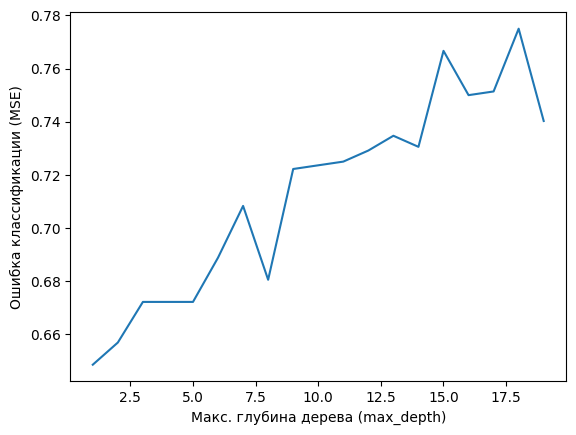

Оптимальные значения max_depth:  [1]


In [9]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

 - Вычисление оценки cross validation (MSE) для различнх значений max_features (построить график зависимости);

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 2, 'max_features': 1}
Лучшие баллы cross validation:  0.35416666666666663


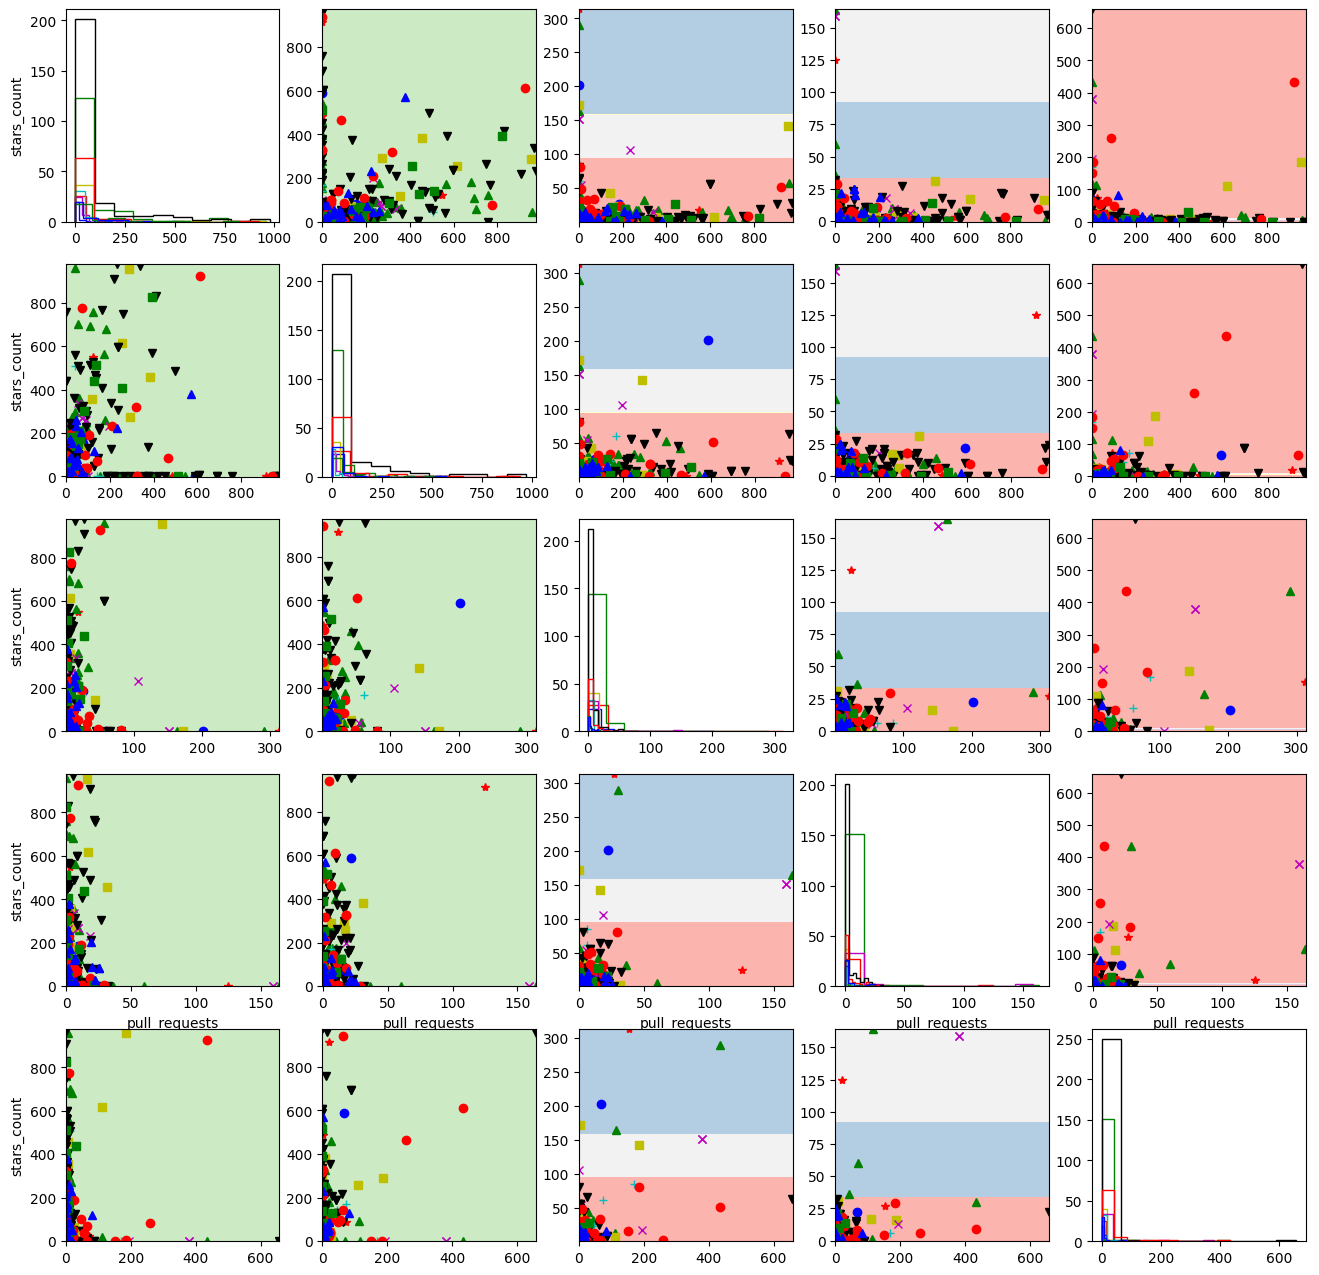

In [13]:
plot_markers = ['r*', 'g^', 'bo', 'ys', 'mx', 'c+', 'kv', 'ro', 'gs', 'b^']

answers = y.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(5, 5, figsize=(16,16))

fmin = X.min()-0.5
fmax = X.max()+0.5
plot_step = 0.2

# Обходим все subplot
for i in range(0,5):
    for j in range(0,5):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=2, random_state=21, max_features=1)
            model.fit(X.iloc[:, [i,j]].values, y)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            xx = xx.astype(np.float32)
            yy = yy.astype(np.float32)
            p = p.astype(np.float32)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(y == answers[id_answer])
            if i==j:
                places[i, j].hist(X.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(X.iloc[idx].iloc[:,i], X.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(X.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(X.columns[i])
        
    

#### Использование модели
Оптимальные параметры определены, можно обучить модель и использовать ее для классификации

In [19]:
# Построим модель для оптимального дерева
# Лучшее сочетание параметров:  {'max_depth': 2, 'max_features': 1}

dtc = DecisionTreeClassifier(max_depth=2, 
                             random_state=21, 
                             max_features=1)
dtc.fit(X.values, y.values)


# Использование классификатора
# Объявление признаков объекта
stars_count = float(input('Введите количество Stars: '))
forks_count = float(input('Введите количество Forks: '))
issues_count = float(input('Введите количество Issues: '))
pull_requests = float(input('Введите количество Pull Requests: '))
contributors = float(input('Введите количество Contributors: '))
X_new = np.array([[stars_count, forks_count, issues_count, pull_requests, contributors]])

# Получение ответа для нового объекта
target = dtc.predict(X_new)[0]

language_mapping_list = [
    'JavaScript',
    'Python',
    'HTML',
    'Java',
    'CSS',
    'TypeScript',
    'Dart',
    'C++',
    'Jupyter Notebook',
    'Ruby'
]
print('\nОсновной язык репозитория с такой статистикой: ', language_mapping_list[target])

Введите количество Stars:  4
Введите количество Forks:  17
Введите количество Issues:  0
Введите количество Pull Requests:  6
Введите количество Contributors:  16



Основной язык репозитория с такой статистикой:  JavaScript


### Контрольные вопросы

1. Поясните принцип построения дерева решений.

Дерево решений — это структура данных, используемая в машинном обучении для принятия решений. Принцип построения дерева решений заключается в разделении данных на подгруппы (поддеревья) таким образом, чтобы в каждой подгруппе объекты были как можно более однородными по отношению к целевой переменной. Процесс построения дерева включает в себя следующие основные шаги:

1. **Выбор признака для разделения (сплита):** Алгоритм выбирает признак и пороговое значение таким образом, чтобы разделить данные на две подгруппы. Цель - максимизировать однородность (например, чистоту) подгрупп относительно целевой переменной.

2. **Рекурсивное применение к подгруппам:** Процесс разделения повторяется для каждой получившейся подгруппы. Каждая подгруппа становится новым узлом в дереве, и процесс разделения повторяется, пока не выполняются некоторые критерии останова.

3. **Определение условий останова:** Критерии останова могут включать в себя достижение максимальной глубины дерева, достижение минимального количества объектов в узле, или критерии, связанные с уменьшением неоднородности.

4. **Присвоение меток листьям:** Когда дерево полностью построено, каждый лист содержит прогноз или класс, который присваивается объектам, попавшим в этот лист.

Построенное дерево решений может быть использовано для классификации (прогнозирования категориальной переменной) или регрессии (прогнозирования числовой переменной). Важным преимуществом деревьев решений является их интерпретируемость, то есть легкость в понимании принятых решений.

2. Укажите статистическое определение информативности.

В статистике, информативность измеряет степень уменьшения неопределенности в данных. Энтропия $H(X)$ для дискретной переменной $X$ с набором значений $\{x_1, x_2, \ldots, x_k\}$ выражается формулой:

$H(X) = -\sum_{i=1}^{k} P(x_i) \log_2(P(x_i))$

где $P(x_i)$ - вероятность появления значения $x_i$ в переменной $X$.

В контексте построения деревьев решений, информативность $Gain$ измеряет, насколько разделение данных по признаку $A$ уменьшает неопределенность в целевой переменной. Формула для информативности:

$ Gain(A) = H(\text{{целевая переменная}}) - \sum_{j} \frac{|\text{{подгруппа j}}|}{|\text{{все данные}}|} \cdot H(\text{{целевая переменная в подгруппе j}}) $

Чем выше значение информативности ($Gain$), тем лучше признак разделяет данные и уменьшает неопределенность. Выбирается признак, максимизирующий информативность.

3. Поясните энтропийное определение информативности.

Энтропийное определение информативности основано на концепции энтропии, измеряющей неопределенность в системе. В деревьях решений энтропийная информативность $Gain$ показывает, насколько разделение данных по признаку $A$ уменьшает энтропию в целевой переменной.

Выражение $H(X) = -\sum_{i=1}^{k} P(x_i) \log_2(P(x_i))$ представляет энтропию для дискретной переменной $X$. Когда применяется к целевой переменной после разделения данных, оно измеряет степень неопределенности в каждой подгруппе.

Формула $Gain(A) = H(\text{{целевая переменная}}) - \sum_{j} \frac{|\text{{подгруппа j}}|}{|\text{{все данные}}|} \cdot H(\text{{целевая переменная в подгруппе j}})$ использует энтропию для оценки, насколько разделение признака $A$ снижает общую энтропию данных. Чем выше значение $Gain$, тем более информативным считается признак для разделения данных.

Таким образом, энтропийное определение информативности связывает энтропию с уменьшением неопределенности в данных при построении деревьев решений.

4. Что такое многоклассовая информативность? Для чего она применяется?

**Многоклассовая информативность:**

Многоклассовая информативность относится к оценке качества разделения данных в многоклассовой классификации. В многоклассовом контексте, когда целевая переменная имеет более двух классов, информативность измеряет, насколько хорошо признак или разделение данных способствует правильной классификации объектов по всем классам.

**Применение:**

1. **Оценка важности признаков:** Многоклассовая информативность используется для определения важности признаков при построении моделей многоклассовой классификации. Это позволяет выявить, какие признаки наиболее информативны для различения между классами.

2. **Выбор оптимальных разделений:** В многоклассовой классификации разделение данных по разным классам должно учитывать информативность каждого разделения для каждого класса. Это помогает выбрать оптимальные точки разделения для максимизации правильных предсказаний по всем классам.

3. **Оценка качества модели:** Многоклассовая информативность является метрикой, используемой для оценки качества моделей в многоклассовой классификации. Чем выше информативность, тем более эффективно модель разделяет данные между различными классами.

Таким образом, многоклассовая информативность играет ключевую роль в оценке и улучшении качества моделей в задачах многоклассовой классификации.

5. Поясните назначение и алгоритм бинаризации количественных признаков.

**Назначение бинаризации количественных признаков:**

Бинаризация количественных признаков используется для преобразования непрерывных числовых значений признаков в бинарные (двоичные) значения. Это полезно, когда требуется присвоить признаку категориальный характер, который можно использовать в моделях машинного обучения, работающих с категориальными данными.

**Алгоритм бинаризации количественных признаков:**

1. **Выбор порога:**
   - Определение порогового значения, по которому будет происходить разделение признака на две категории (бинарные значения).

2. **Присвоение бинарных значений:**
   - Все значения признака, превышающие порог, могут быть отнесены к одной категории (например, 1), а все значения, меньшие порога, к другой категории (например, 0).

3. **Применение в моделях:**
   - Бинаризованный признак может быть использован в различных моделях машинного обучения, таких как деревья решений, логистическая регрессия и другие, которые работают с категориальными данными.

Пример на Python с использованием библиотеки Pandas:

```python
import pandas as pd

# Загрузка данных
data = pd.read_csv('data.csv')

# Выбор порога (например, медианы)
threshold = data['quantitative_feature'].median()

# Бинаризация признака
data['binary_feature'] = (data['quantitative_feature'] > threshold).astype(int)
```

Таким образом, бинаризация количественных признаков позволяет учесть категориальные аспекты данных в моделях, которые работают с бинарными значениями.

6. Поясните порядок поиска закономерностей в форме конъюнкций.

**Порядок поиска закономерностей в форме конъюнкций:**

1. **Выбор признака:**
   - На первом этапе выбирается признак, по которому будет проводиться разделение данных. Этот выбор осуществляется на основе метрики информативности, такой как энтропия или критерий Джини.

2. **Определение порога:**
   - Для количественных признаков определяется пороговое значение, по которому будет проводиться разделение данных на две подгруппы. Для категориальных признаков выбор заключается в разделении данных по категориям.

3. **Создание узла дерева:**
   - На основе выбранного признака и порогового значения создается узел дерева, представляющий условие (конъюнкцию). Это условие формирует правило вида "Если [условие], то перейти в следующий узел".

4. **Разделение данных:**
   - Данные разделяются на две подгруппы в соответствии с условием, созданным на предыдущем шаге. Одна подгруппа переходит в левую ветвь дерева, а другая - в правую.

5. **Рекурсивное применение:**
   - Процесс рекурсивно повторяется для каждого узла, создавая новые условия на каждом уровне дерева. Каждый узел представляет собой конъюнкцию условий, которые необходимо выполнить для перехода в соответствующую ветвь.

6. **Остановка рекурсии:**
   - Рекурсивный процесс прекращается при достижении критериев остановки, таких как максимальная глубина дерева, минимальное количество объектов в узле или другие заданные условия.

7. **Создание листьев дерева:**
   - Когда достигнуты критерии остановки, узлы дерева превращаются в листья, представляющие конечные прогнозы или классы.

Таким образом, порядок поиска закономерностей в форме конъюнкций в деревьях решений заключается в выборе признаков, определении порогов для разделения данных, создании узлов дерева с условиями и рекурсивном построении структуры дерева до достижения критериев остановки.